<a href="https://colab.research.google.com/github/SamuelJordanTK/Deep-Learning-Practical-Files-B.Tech-AI-DS/blob/main/Samuel_2231173_Deep_Learning_Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2

## Aim: Deploy the Confusion Matrix and Simulate for Overfitting

In this experiment, we will implement a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. We will also analyze the model's performance using a confusion matrix and demonstrate how overfitting can occur during training.


## Step 1: Set Up the Environment

First, we need to import the necessary libraries. This includes TensorFlow for building the neural network, NumPy for numerical operations, and Matplotlib for visualization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Step 2: Load the CIFAR-10 Dataset

CIFAR-10 consists of 60,000 32x32 color images in 10 classes. We will load the dataset and split it into training and test sets.

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#Display the shape of the datasets
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


## Step 3: Build the Convolutional Neural Network

We will create a simple CNN architecture to classify the images.

In [ ]:
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10) # Output layer for 10 classes
])

model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## Step 4: Train the Model

We will train the model on the training set and validate it using the test set. To simulate overfitting, we will use a high number of epochs.



In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6851 - loss: 0.8986 - val_accuracy: 0.6627 - val_loss: 0.9534
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.7073 - loss: 0.8303 - val_accuracy: 0.6845 - val_loss: 0.8954
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7344 - loss: 0.7587 - val_accuracy: 0.7019 - val_loss: 0.8732
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7499 - loss: 0.7137 - val_accuracy: 0.6936 - val_loss: 0.9030
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7639 - loss: 0.6839 - val_accuracy: 0.6875 - val_loss: 0.9112
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7785 - loss: 0.6295 - val_accuracy: 0.6984 - val_loss: 0.9100
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7918 - loss: 0.5950 - val_accuracy: 0.6863 - val_loss: 0.9605
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8015 -

## Step 5: Evaluate Model Performance

After training, we will evaluate the model on the test set and generate a confusion matrix to visualize its performance.


313/313 - 9s - 27ms/step - accuracy: 0.6962 - loss: 1.3398

Test accuracy: 0.6962000131607056
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


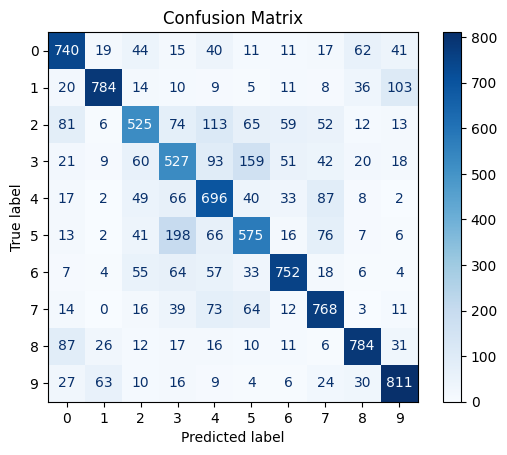

In [ ]:
#Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

#Make predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

#Generate confusion matrix
cm = confusion_matrix(test_labels.flatten(), predicted_classes)

#Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show();


## Step 6: Analyze Overfitting

To analyze overfitting visually, we can plot training and validation accuracy over epochs.

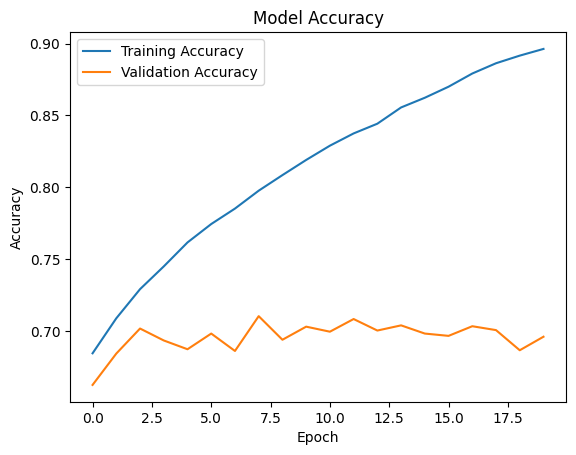

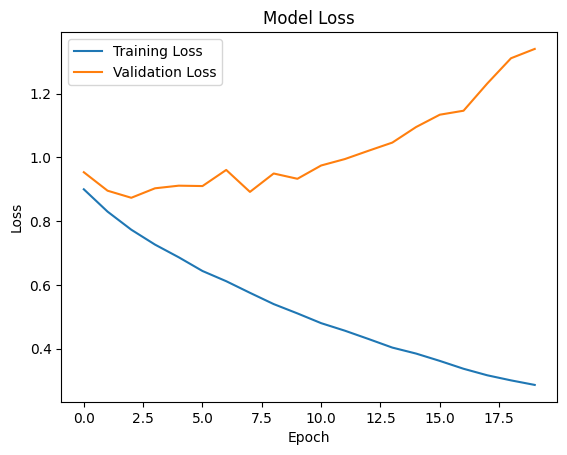

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show();

### Conclusion

In this experiment, we successfully built a CNN to classify CIFAR-10 images and evaluated its performance using a confusion matrix. The accuracy plots indicate whether overfitting occurred during training. If there is a significant gap between training and validation accuracy or loss curves diverge after a certain epoch, it suggests that overfitting is present.